In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ipl.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [26]:
print(f"Your Rows are : {df.shape[0]} and Columns are : {df.shape[1]}")

Your Rows are : 74 and Columns are : 20


In [27]:
df.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [29]:
data = pd.DataFrame(df)
winners = df['match_winner'].value_counts()

/var/folders/05/1kcjl_1j4_vcgs0k6cxdb5pc0000gn/T/ipykernel_67627/2448480803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: ylabel='match_winner'>

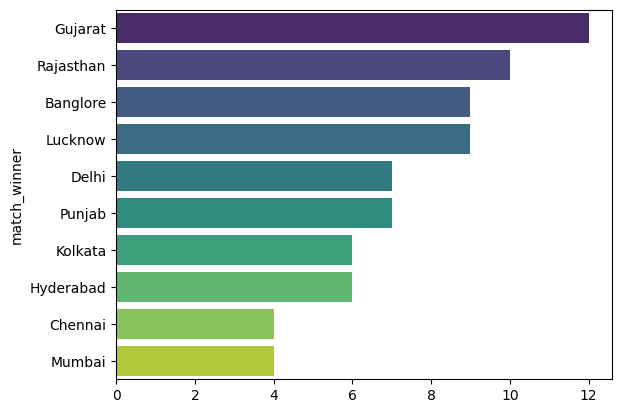

In [36]:
sns.barplot(
    y=winners.index,
    x=winners.values,
    palette='viridis'
)

<Axes: xlabel='toss_decision', ylabel='count'>

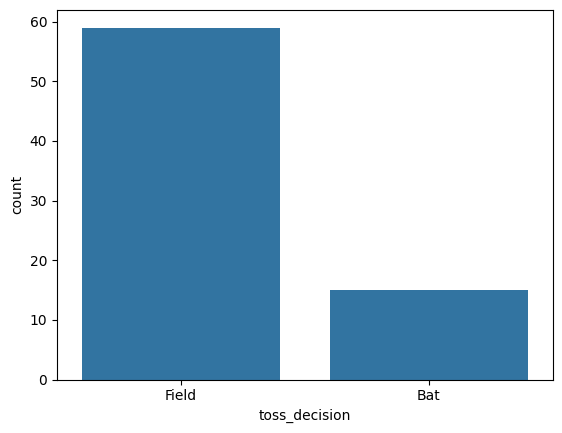

In [38]:
sns.countplot(x=df['toss_decision'])

In [42]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100) / df.shape[0]
percentage.round(2)

np.float64(48.65)

<Axes: xlabel='won_by', ylabel='count'>

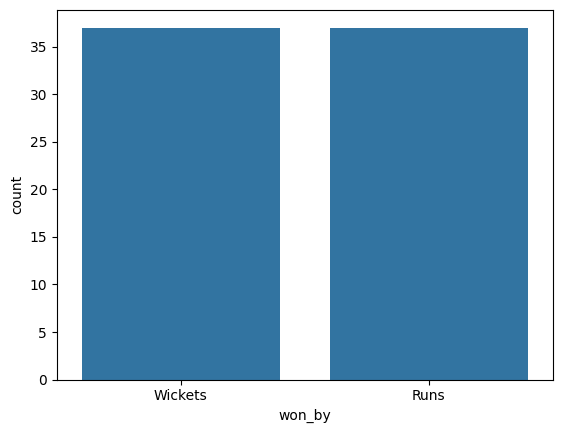

In [43]:
sns.countplot(x=df['won_by'])

<Axes: ylabel='player_of_the_match'>

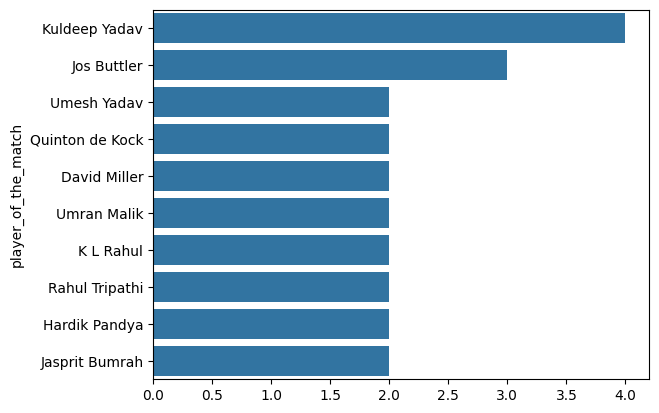

In [45]:
count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x=count.values,y=count.index)

<Axes: xlabel='top_scorer', ylabel='highscore'>

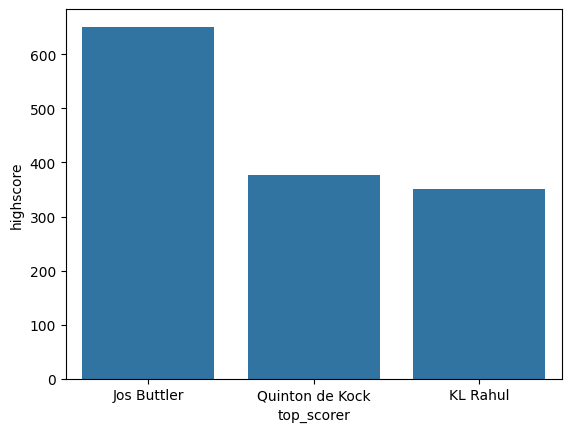

In [51]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(3)
sns.barplot(high)

<Axes: xlabel='best_bowling', ylabel='highest_wickets'>

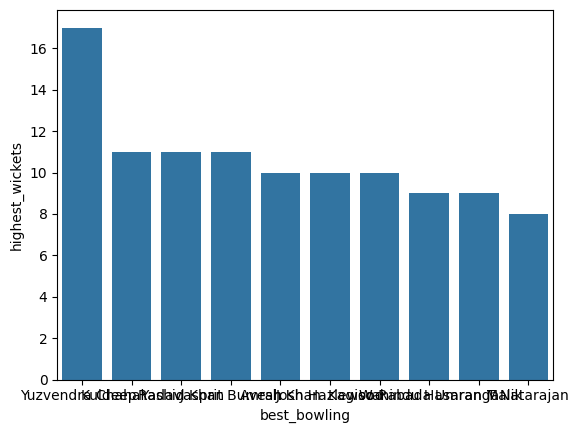

In [61]:
df["highest_wickets"] = df['best_bowling_figure'].apply(lambda x : x.split('--')[0])
df["highest_wickets"] = df["highest_wickets"].astype(int)
best_b = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
sns.barplot(best_b)